In [478]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [479]:
#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [480]:
#set up seed for consistancy
torch.manual_seed(1)
#batch_size = 64
def batchData(batch_size):
        #get MNIST dataset
    data_train = torchvision.datasets.MNIST(root='./data', 
                                               train=True, 
                                               transform=transforms.ToTensor(),  
                                               download=True)

    data_test = torchvision.datasets.MNIST(root='./data', 
                                              train=False, 
                                              transform=transforms.ToTensor(),
                                              download=True)
    train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                              shuffle=True)

    test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                             shuffle=False)
    
    return train_loader,test_loader

In [481]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(10, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(16*5*5, 20), 
            nn.ReLU(),
            nn.Linear(20, 10)
        )

    def forward(self, x):
        outputs = self.convolution(x)
        return outputs

In [482]:
model_one = CNN_1().to(device)



In [483]:
def trainModel(model,num_epochs):
    n_total_steps = len(train_loader)
    loss_train = []
    epochs = []
    accuracy_train = []
    print('Training the model')
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        n_correct = 0
        n_samples = 0
        count = 0 
        loss_per_batch = 0
        for i, (inputs, labels) in enumerate(train_loader): 
            count +=1
            # get the inputs; data is a list of [inputs, labels]
            #inputs, labels = data
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer_sgd.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs).to(device)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer_sgd.step()
            loss_per_batch += loss.data
            # print statistics
            #running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy : {acc} %')
                #loss_train.append(loss.item())
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy : {acc} %')
        epochs.append(epoch)
        accuracy_train.append(acc)
        loss_per_batch /= count
        loss_train.append(loss_per_batch)
    print('Training done')            
    return epochs,loss_train,accuracy_train

In [484]:
learning_rate = 0.001
loss_func = nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.SGD(model_one.parameters(), lr=learning_rate)

In [485]:
train_loader, test_loader = batchData(64)
epochs,loss_train,accuracy_train=trainModel(model_one,20)
model1_parameters = torch.nn.utils.parameters_to_vector(model_one.parameters())

Training the model
Epoch [1/10], Step [100/938], Loss: 2.3028, Accuracy : 10.171875 %
Epoch [1/10], Step [200/938], Loss: 2.3110, Accuracy : 10.015625 %
Epoch [1/10], Step [300/938], Loss: 2.3123, Accuracy : 10.192708333333334 %
Epoch [1/10], Step [400/938], Loss: 2.3167, Accuracy : 10.140625 %
Epoch [1/10], Step [500/938], Loss: 2.3063, Accuracy : 10.253125 %
Epoch [1/10], Step [600/938], Loss: 2.3122, Accuracy : 10.427083333333334 %
Epoch [1/10], Step [700/938], Loss: 2.3059, Accuracy : 10.515625 %
Epoch [1/10], Step [800/938], Loss: 2.3050, Accuracy : 10.626953125 %
Epoch [1/10], Step [900/938], Loss: 2.3119, Accuracy : 10.65451388888889 %
Epoch [1/10], Loss: 2.3077, Accuracy : 10.636666666666667 %
Epoch [2/10], Step [100/938], Loss: 2.3098, Accuracy : 10.359375 %
Epoch [2/10], Step [200/938], Loss: 2.3209, Accuracy : 10.5703125 %
Epoch [2/10], Step [300/938], Loss: 2.3013, Accuracy : 10.291666666666666 %
Epoch [2/10], Step [400/938], Loss: 2.2934, Accuracy : 10.31640625 %
Epoch [2/

In [486]:
learning_rate = 0.001
loss_func = nn.CrossEntropyLoss()
model_two = CNN_1().to(device)
optimizer_sgd = torch.optim.SGD(model_two.parameters(), lr=learning_rate)
train_loader, test_loader = batchData(512)
epochs,loss_train,accuracy_train=trainModel(model_two,20)

Training the model
Epoch [1/10], Step [100/118], Loss: 2.3159, Accuracy : 8.115234375 %
Epoch [1/10], Loss: 2.3027, Accuracy : 8.21 %
Epoch [2/10], Step [100/118], Loss: 2.3108, Accuracy : 9.091796875 %
Epoch [2/10], Loss: 2.3032, Accuracy : 9.138333333333334 %
Epoch [3/10], Step [100/118], Loss: 2.3163, Accuracy : 9.986328125 %
Epoch [3/10], Loss: 2.2913, Accuracy : 10.063333333333333 %
Epoch [4/10], Step [100/118], Loss: 2.3065, Accuracy : 10.951171875 %
Epoch [4/10], Loss: 2.3044, Accuracy : 11.04 %
Epoch [5/10], Step [100/118], Loss: 2.3019, Accuracy : 12.02734375 %
Epoch [5/10], Loss: 2.2989, Accuracy : 12.2 %
Epoch [6/10], Step [100/118], Loss: 2.2998, Accuracy : 13.451171875 %
Epoch [6/10], Loss: 2.2745, Accuracy : 13.536666666666667 %
Epoch [7/10], Step [100/118], Loss: 2.2960, Accuracy : 14.802734375 %
Epoch [7/10], Loss: 2.3166, Accuracy : 14.871666666666666 %
Epoch [8/10], Step [100/118], Loss: 2.2981, Accuracy : 15.953125 %
Epoch [8/10], Loss: 2.2949, Accuracy : 15.94166666

In [493]:
model2_parameters = torch.nn.utils.parameters_to_vector(model_two.parameters())
alpha = np.linspace(-2.0, 2.0, num = 50)
theta_arr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*model1_parameters + alpha[i]* model2_parameters
    theta_arr.append(theta)

In [498]:
alpha_train_lss= []
alpha_test_lss = []
alpha_train_acc = []
alpha_test_acc = []

In [499]:
def calculate_loss(model, loader, loss_fn):
    pred_corr = 0
    total_count = 0
    loss_Total = 0
    loss_Counter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            loss_Total += cost
            loss_Counter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    pred_corr += 1
                total_count += 1
    return loss_Total / loss_Counter, round(pred_corr/total_count, 3)



for i in range (len(theta_arr)):
    torch.manual_seed(1)
    thta = (1-alpha[i])* model1_parameters + alpha[i]*model2_parameters
    model = CNN_1()
    torch.nn.utils.vector_to_parameters(thta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    tmp = []
    for param in model.parameters():
        tmp.append(torch.numel(param))

    alpha_trn_loss, alpha_trn_acc = calculate_loss(model, train_loader, loss_func)
    alpha_tst_loss, alpha_tst_acc = calculate_loss(model, test_loader, loss_func)
    alpha_train_lss.append(alpha_trn_loss)
    alpha_train_acc.append(alpha_trn_acc)
    alpha_test_lss.append(alpha_tst_loss)
    alpha_test_acc.append(alpha_tst_acc)

Text(0.5, 1.0, 'Flatness vs Generalization part 1')

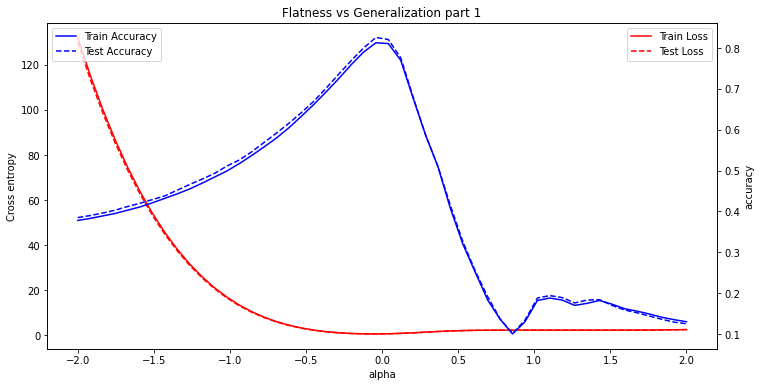

In [501]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_lss, color = "r")
plt.plot(alpha, alpha_test_lss, color = "r",linestyle='--')
plt.legend(['Train Loss' , 'Test Loss'])
plt.ylabel('Cross entropy')
plt.xlabel('alpha')
plt.twinx()

plt.plot(alpha, alpha_train_acc, color = "b")
plt.plot(alpha, alpha_test_acc, color = "b",linestyle='--')
plt.legend(['Train Accuracy' , 'Test Accuracy'],loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.title('Flatness vs Generalization part 1')

Training the model
Epoch [1/20], Step [100/600], Loss: 2.3153, Accuracy : 9.02 %
Epoch [1/20], Step [200/600], Loss: 2.3176, Accuracy : 8.92 %
Epoch [1/20], Step [300/600], Loss: 2.3048, Accuracy : 8.88 %
Epoch [1/20], Step [400/600], Loss: 2.3021, Accuracy : 8.965 %
Epoch [1/20], Step [500/600], Loss: 2.3053, Accuracy : 9.024 %
Epoch [1/20], Step [600/600], Loss: 2.2961, Accuracy : 9.01 %
Epoch [1/20], Loss: 2.2961, Accuracy : 9.01 %
Epoch [2/20], Step [100/600], Loss: 2.3025, Accuracy : 8.77 %
Epoch [2/20], Step [200/600], Loss: 2.3046, Accuracy : 8.865 %
Epoch [2/20], Step [300/600], Loss: 2.2899, Accuracy : 8.926666666666666 %
Epoch [2/20], Step [400/600], Loss: 2.2877, Accuracy : 9.3425 %
Epoch [2/20], Step [500/600], Loss: 2.2994, Accuracy : 10.17 %
Epoch [2/20], Step [600/600], Loss: 2.2867, Accuracy : 11.24 %
Epoch [2/20], Loss: 2.2867, Accuracy : 11.24 %
Epoch [3/20], Step [100/600], Loss: 2.2966, Accuracy : 18.68 %
Epoch [3/20], Step [200/600], Loss: 2.2942, Accuracy : 20.095

Text(0.5, 1.0, 'Flatness vs Generalization part 1')

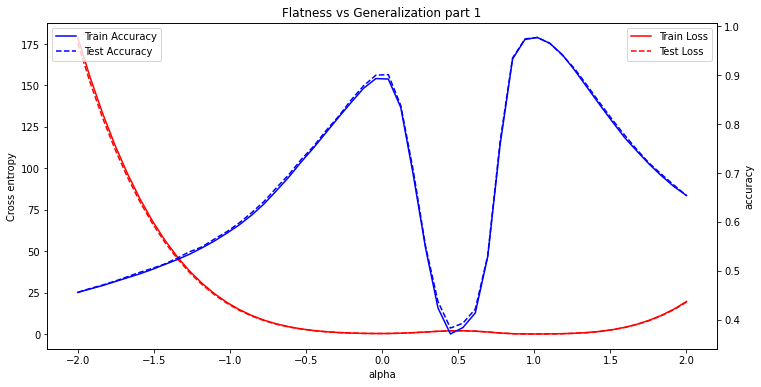

In [503]:
learning_rate = 1e-3
loss_func = nn.CrossEntropyLoss()
model_one = CNN_1().to(device)
optimizer_sgd = torch.optim.SGD(model_one.parameters(), lr=learning_rate)
train_loader, test_loader = batchData(100)
epochs,loss_train,accuracy_train=trainModel(model_one,20)

model1_parameters = torch.nn.utils.parameters_to_vector(model_one.parameters())
learning_rate = 1e-2
loss_func = nn.CrossEntropyLoss()
model_two = CNN_1().to(device)
optimizer_sgd = torch.optim.SGD(model_two.parameters(), lr=learning_rate)
train_loader, test_loader = batchData(100)
epochs,loss_train,accuracy_train=trainModel(model_two,20)


model2_parameters = torch.nn.utils.parameters_to_vector(model_two.parameters())
alpha = np.linspace(-2.0, 2.0, num = 50)
theta_arr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*model1_parameters + alpha[i]* model2_parameters
    theta_arr.append(theta)
    
    
alpha_train_lss= []
alpha_test_lss = []
alpha_train_acc = []
alpha_test_acc = []

for i in range (len(theta_arr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* model1_parameters + alpha[i]*model2_parameters
    model = CNN_1()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    tmp = []
    for param in model.parameters():
        tmp.append(torch.numel(param))

    alpha_trn_loss, alpha_trn_acc = calculate_loss(model, train_loader, loss_func)
    alpha_tst_loss, alpha_tst_acc = calculate_loss(model, test_loader, loss_func)
    alpha_train_lss.append(alpha_trn_loss)
    alpha_train_acc.append(alpha_trn_acc)
    alpha_test_lss.append(alpha_tst_loss)
    alpha_test_acc.append(alpha_tst_acc)
    
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_lss, color = "r")
plt.plot(alpha, alpha_test_lss, color = "r",linestyle='--')
plt.legend(['Train Loss' , 'Test Loss'])
plt.ylabel('Cross entropy')
plt.xlabel('alpha')
plt.twinx()

plt.plot(alpha, alpha_train_acc, color = "b")
plt.plot(alpha, alpha_test_acc, color = "b",linestyle='--')
plt.legend(['Train Accuracy' , 'Test Accuracy'],loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.title('Flatness vs Generalization part 1')